In [96]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
cardio_data = pd.read_csv("/Users/rajasekharkalamata/Downloads/CardioGoodFitness.csv")

cardio_data.shape
# 180 records with 9 columns

(180, 9)

In [102]:
cardio_data.columns
# 9 columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [103]:
cardio_data.head()
#A sample data from dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [104]:
cardio_data.info()
#Any null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [105]:
cardio_data[['Age','Miles']].describe()

,Age,Miles
count,180.000000,180.000000
mean,28.788889,103.194444
std,6.943498,51.863605
min,18.000000,21.000000
25%,24.000000,66.000000
50%,26.000000,94.000000
75%,33.000000,114.750000
max,50.000000,360.000000


In [106]:
cardio_data.agg(
    {
        "Age": ["min", "max", "median","mean"],
        "Fitness": ["min", "max", "median", "mean"],
    }
)
# The Minimum, Maximum, Median Age of all the Members and their Mean Fitness


,Age,Fitness
min,18.000000,1.000000
max,50.000000,5.000000
median,26.000000,3.000000
mean,28.788889,3.311111


In [107]:
cardio_data.isna().any().any()
# No Missing values
cardio_data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [108]:
# cardio_data.loc[:, cardio_data.isnull().any()].columns
cardio_data.dropna()
# Drop Records if any missing values

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [109]:
cardio_data.profile_report()
# Profile Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<function matplotlib.pyplot.show(close=None, block=None)>

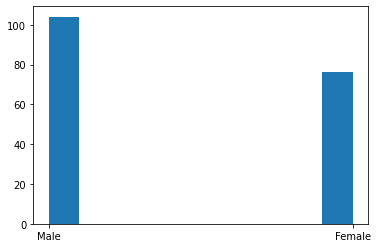

In [37]:
plt.hist(cardio_data['Gender'])
plt.show
#Number of Males to Females Ratio

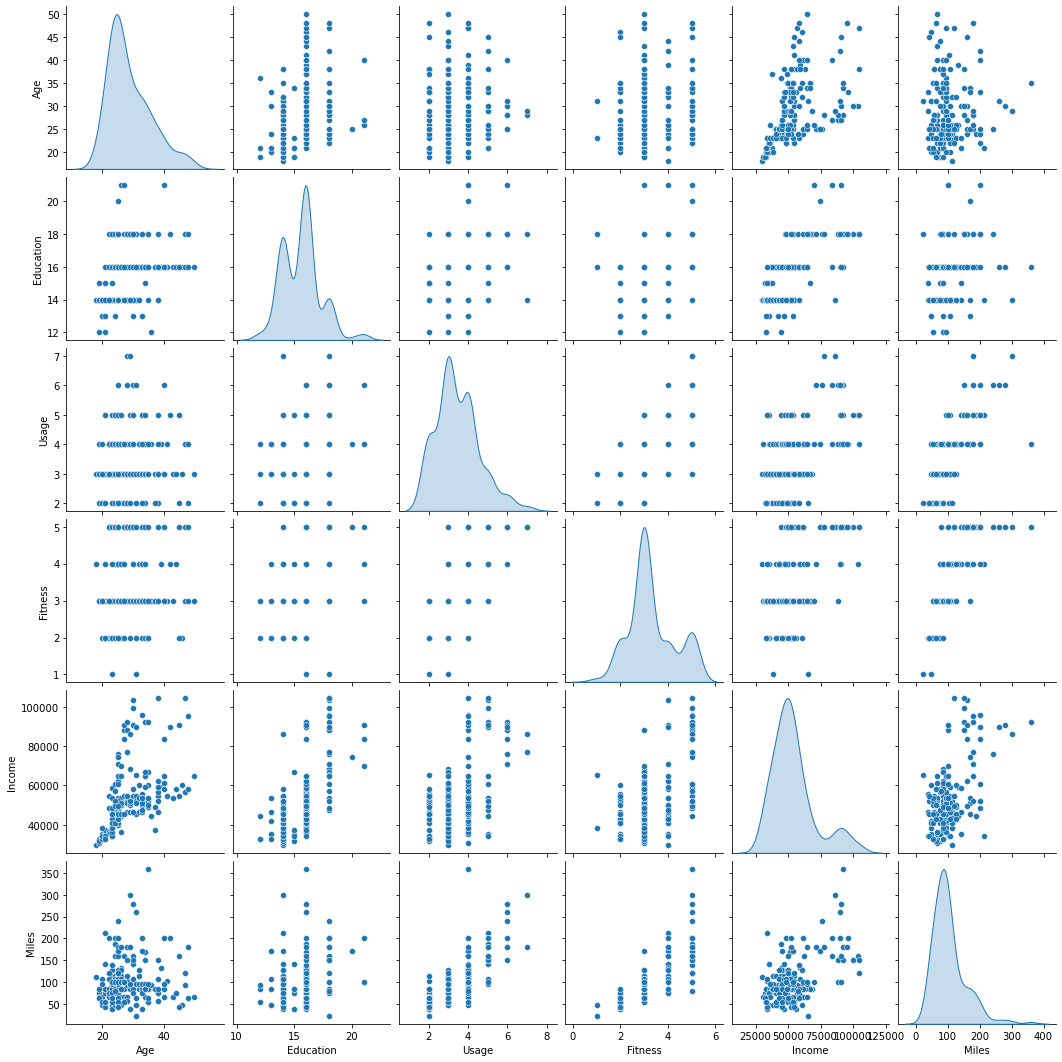

In [47]:
sns.pairplot(cardio_data, diag_kind="kde")
# plt.show

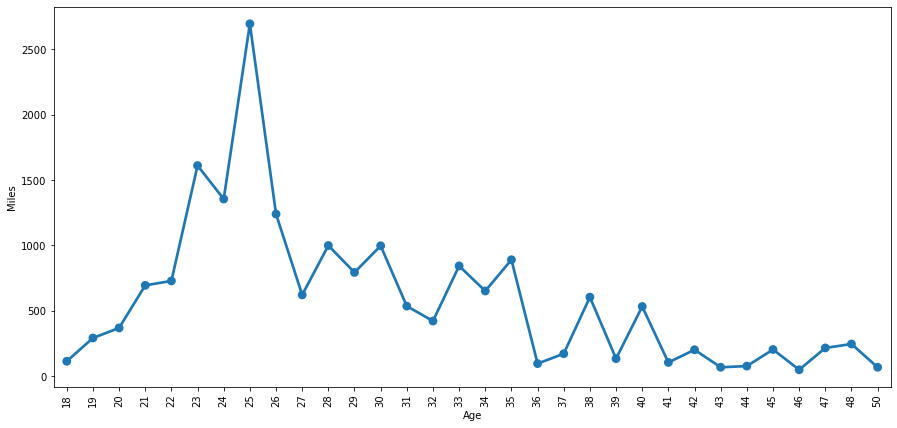

In [48]:
#Correlation between Age and Miles
plt.figure(figsize=(15, 7))
sns.pointplot(x='Age', y='Miles', data=cardio_data, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

#People in thir 20's have highest Miles
# As Age increases, the number of Miles decreases

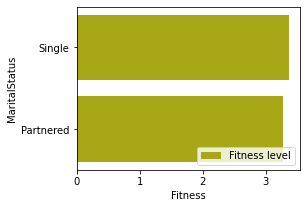

In [63]:
#Correlation between Fitness and MaritalStatus
plt.figure(figsize = (4,3)) # To resize the plot

# Plot between MaritalStatus and Fitness levels
sns.barplot(x="Fitness", y="MaritalStatus", data=cardio_data,
            label="Fitness level", color="y", ci=None)

# Add a legend
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

#Both Single and Partnered Fitness levels are same

<AxesSubplot:xlabel='Fitness', ylabel='Usage'>

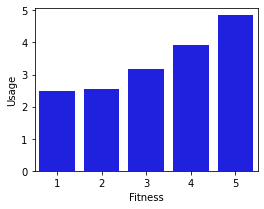

In [64]:
#Correlation between Fitness and Usage
plt.figure(figsize = (4,3)) # To resize the plot

# Plot between MaritalStatus and Usage levels
sns.barplot(x="Fitness", y="Usage", data=cardio_data,
            label="Fitness level", color="b", ci=None)

#The more they use the more they become fit

(array([ 10.,   0., 110.,  60.]),
 array([0. , 0.5, 1. , 1.5, 2. ]),
 <BarContainer object of 4 artists>)

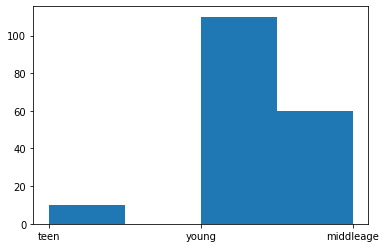

In [116]:
bins = [ 0, 20, 30, 50, 60 ]
labels = ['teen', 'young', 'middleage', 'senior']
cardio_data['bin_cut_manual'] = pd.cut(cardio_data['Age'] , bins=bins, labels=labels, include_lowest=True)
plt.hist(cardio_data['bin_cut_manual'], bins=4)
# plt.show()

In [83]:
cardio_data['Yr_cut'] = pd.cut(cardio_data.Miles, bins=4, right=True).head()

In [84]:
cardio_data['Yr_cut'].value_counts()
# .plot(kind='barh')
# plt.show()

(20.661, 105.75]    4
(105.75, 190.5]     1
(190.5, 275.25]     0
(275.25, 360.0]     0
Name: Yr_cut, dtype: int64

In [92]:
cardio_data['age_cut'] = pd.cut(cardio_data.Age, bins=[0, 20, 40, 50]).value_counts()

cardio_data['age_cut']
# cardio_data['age_cut'].plot(kind='bar')
# plt.show()

0       NaN
1      10.0
2      10.0
3      10.0
4      10.0
       ... 
175     NaN
176     NaN
177     NaN
178     NaN
179     NaN
Name: age_cut, Length: 180, dtype: float64

In [ ]:
#Obervations
# Customers whose Income is less than 70,000 are burning more miles
# Customers irrespective of their Maritas Staus are achieving the same fitness level
# People below 30 are frequent users and they are more fit.
# Most number of customers are using Products TM195 and TM498
# People in thir 20's have highest Miles As Age increases, the number of Miles decreases
